<a href="https://colab.research.google.com/github/ANURAGBALAKRISHNAN/Air_Quality_in_India_2015-2020/blob/main/Capstone_Project_Air_Quality_Data_in_Cities_in_India_(2015_2020)_Anurag_Balakrishnan_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **A Comprehensive Study on Air Quality Data in Cities in India between 2015 - 2020**

**A. Project Definition & Scope**


*   This project focuses on analyzing Air Quality Data in India (2015–2020) to understand pollution patterns and their potential impact on public health and the environment.

*   The scope is limited to data analytics and exploratory data analysis (EDA), covering data cleaning, preprocessing, descriptive statistics, and insight generation.











**B. Objectives**


The main objectives of this project are:



*   To load, clean, and preprocess raw air quality data to ensure it is analysis-ready.

*   To conduct descriptive and exploratory analysis for uncovering trends and relationships in pollutant levels.


*   To summarize statistical findings and provide clear, data-driven insights.

*   To develop a structured Python workflow demonstrating end-to-end data analytics capability.










**C. Dataset Details**


*   Source: Kaggle (compiled from Central Pollution Control Board, India).

*   Link: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india/data  

*   Time Period: 2015 – 2020.

*   Granularity: Both daily (city_day.csv) and hourly (city_hour.csv) measurements.

*   Coverage: Multiple Indian cities including Delhi, Mumbai, Kolkata, Chennai, Hyderabad, Bengaluru, etc.

*   Key Variables:  
    
    Pollutants:
      
        PM2.5 – Particulate Matter smaller than 2.5 micrometers (can penetrate lungs and bloodstream; causes respiratory & cardiovascular issues)
        PM10 – Particulate Matter smaller than 10 micrometers (irritates nose, throat, and lungs)               
        NO – Nitric Oxide (contributes to smog; harmful to lungs)
        NO₂ – Nitrogen Dioxide (causes inflammation of airways, reduces lung function)
        NOₓ – Nitrogen Oxides (major contributor to ground-level ozone & acid rain)
        NH₃ – Ammonia (causes irritation of eyes, nose, throat)
        CO – Carbon Monoxide (reduces oxygen delivery to organs; toxic at high levels)
        SO₂ – Sulfur Dioxide (causes asthma symptoms, acid rain contributor)
        O₃ – Ozone (harms lungs, triggers asthma; “good” in stratosphere but harmful at ground level)
        Benzene, Toluene, Xylene (VOCs) (linked to headaches, dizziness; long-term exposure can be carcinogenic)

*   Indicators: Air Quality Index (AQI) and AQI_Bucket (Good, Moderate, Poor, etc.).

*   Temporal: Date, Time (in hourly dataset).

*   Location: City.


















**D. Methodology / Steps**

**1. Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

**2. Load the Dataset**

In [ ]:
# Choose your CSV files from your computer

city_day = pd.read_csv("/content/city_day.csv")
city_hour = pd.read_csv("/content/city_hour.csv")

In [ ]:
# Load each CSV into a separate DataFrame
city_day_df = pd.read_csv('city_day.csv')
city_hour_df = pd.read_csv('city_hour.csv')

**3. Initial overview of each dataset**

In [ ]:
# Number of rows and columns
print("city_day.csv shape:", city_day_df.shape)

city_day.csv shape: (29531, 16)


In [ ]:
print("city_hour.csv shape:", city_hour_df.shape)

city_hour.csv shape: (707875, 16)


In [ ]:
# Column names and data types
print("city_day.csv info:", city_day_df.info)

city_day.csv info: <bound method DataFrame.info of                 City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO

In [ ]:
print("city_hour.csv info:", city_hour_df.info)

city_hour.csv info: <bound method DataFrame.info of                  City             Datetime  PM2.5   PM10    NO    NO2    NOx  \
0           Ahmedabad  2015-01-01 01:00:00    NaN    NaN  1.00  40.01  36.37   
1           Ahmedabad  2015-01-01 02:00:00    NaN    NaN  0.02  27.75  19.73   
2           Ahmedabad  2015-01-01 03:00:00    NaN    NaN  0.08  19.32  11.08   
3           Ahmedabad  2015-01-01 04:00:00    NaN    NaN  0.30  16.45   9.20   
4           Ahmedabad  2015-01-01 05:00:00    NaN    NaN  0.12  14.90   7.85   
...               ...                  ...    ...    ...   ...    ...    ...   
707870  Visakhapatnam  2020-06-30 20:00:00   9.50  36.00  2.75  25.57  15.85   
707871  Visakhapatnam  2020-06-30 21:00:00  17.25  49.25  3.62  33.20  20.62   
707872  Visakhapatnam  2020-06-30 22:00:00  36.00  71.00  2.20  30.80  18.20   
707873  Visakhapatnam  2020-06-30 23:00:00  15.75  63.00  1.02  28.90  16.00   
707874  Visakhapatnam  2020-07-01 00:00:00  15.00  66.00  0.40  26.8

In [ ]:
# Column names
print(city_day_df.columns)

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [ ]:
print(city_hour_df.columns)

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [ ]:
# First 5 rows
city_day_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
city_hour_df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [ ]:
# Summary of data types and non-null counts
city_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
city_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [ ]:
# Statistical summary of numeric columns
city_day_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
city_hour_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


**4. Data Pre-processing - performing all necessary cleaning steps**

In [ ]:
# Steps for each data file (city_day, city_hour, station_day, station_hour):
# - Handle missing values (impute numerical with median, categorical with 'Unknown')
# - Remove duplicates
# - Correct data types (Date/Datetime to datetime)
# - Create derived columns (Year, Month, Season for data files)
# - Save cleaned files for later use

In [ ]:
# Handling missing values
print("\nMissing values (city_day):")
print(city_day.isnull().sum())

print("\nMissing values (city_hour):")
print(city_hour.isnull().sum())


Missing values (city_day):
City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

Missing values (city_hour):
City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64


In [ ]:
# Fill numeric missing values with median values
city_day.fillna(city_day.median(numeric_only=True), inplace=True)
city_hour.fillna(city_hour.median(numeric_only=True), inplace=True)


In [ ]:
# Removing duplicates
city_day.drop_duplicates(inplace=True)
city_hour.drop_duplicates(inplace=True)

In [ ]:
# Correcting data types
city_day["Date"] = pd.to_datetime(city_day["Date"])
city_hour["Datetime"] = pd.to_datetime(city_hour["Datetime"])

In [ ]:
# Creating derived columns
city_day["Year"] = city_day["Date"].dt.year
city_day["Month"] = city_day["Date"].dt.month
city_hour["Year"] = city_hour["Datetime"].dt.year
city_hour["Month"] = city_hour["Datetime"].dt.month

In [ ]:
# Filtering / Aggregating
avg_aqi_by_city = city_day.groupby("City")["AQI"].mean().sort_values(ascending=False)
print("\nAverage AQI by city:")
print(avg_aqi_by_city.head(10))


Average AQI by city:
City
Ahmedabad       339.861623
Delhi           258.783474
Patna           214.414962
Lucknow         212.200597
Gurugram        210.704586
Talcher         159.417297
Jorapokhar      145.207015
Brajrajnagar    142.537313
Guwahati        139.802789
Kolkata         138.902948
Name: AQI, dtype: float64


In [ ]:
# Save Cleaned Files
city_day.to_csv("/content/city_day_cleaned.csv", index=False)
city_hour.to_csv("/content/city_hour_cleaned.csv", index=False)

print("✅ Cleaned files saved successfully!")

✅ Cleaned files saved successfully!


In [ ]:
# Reload Cleaned Files
city_day_cleaned = pd.read_csv("/content/city_day_cleaned.csv")
city_hour_cleaned = pd.read_csv("/content/city_hour_cleaned.csv")

In [ ]:
print(city_day_cleaned.shape)

(29531, 18)


In [ ]:
print(city_day_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         29531 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     29531 non-null  float64
 12  Toluene     29531 non-null  float64
 13  Xylene      29531 non-null  float64
 14  AQI         29531 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
 16  Year        29531 non-null  int64  
 17  Month       29531 non-null  int64  
dtypes: float64(13), int64(2), object(3)
memory usage: 4.1+ MB
None


In [ ]:
print(city_day_cleaned.head())

        City        Date  PM2.5   PM10     NO    NO2    NOx    NH3     CO  \
0  Ahmedabad  2015-01-01  48.57  95.68   0.92  18.22  17.15  15.85   0.92   
1  Ahmedabad  2015-01-02  48.57  95.68   0.97  15.69  16.46  15.85   0.97   
2  Ahmedabad  2015-01-03  48.57  95.68  17.40  19.30  29.70  15.85  17.40   
3  Ahmedabad  2015-01-04  48.57  95.68   1.70  18.48  17.97  15.85   1.70   
4  Ahmedabad  2015-01-05  48.57  95.68  22.10  21.42  37.76  15.85  22.10   

     SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  Year  Month  
0  27.64  133.36     0.00     0.02    0.00  118.0        NaN  2015      1  
1  24.55   34.06     3.68     5.50    3.77  118.0        NaN  2015      1  
2  29.07   30.70     6.80    16.40    2.25  118.0        NaN  2015      1  
3  18.59   36.08     4.43    10.14    1.00  118.0        NaN  2015      1  
4  39.33   39.31     7.01    18.89    2.78  118.0        NaN  2015      1  


In [ ]:
print(city_day_cleaned.describe())

              PM2.5          PM10            NO           NO2           NOx  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      64.510857    109.659366     16.642601     27.726576     31.063568   
std       59.807551     72.324020     21.506064     23.050531     29.477748   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       32.150000     79.315000      6.210000     12.980000     14.670000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       72.450000    111.880000     17.570000     34.665000     36.015000   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      20.813789      2.153872     13.830897     33.994121      2.859874   
std       21.028862      6.724660     17.005647    

In [ ]:
print(city_hour_cleaned.shape)

(707875, 18)


In [ ]:
print(city_hour_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       707875 non-null  float64
 3   PM10        707875 non-null  float64
 4   NO          707875 non-null  float64
 5   NO2         707875 non-null  float64
 6   NOx         707875 non-null  float64
 7   NH3         707875 non-null  float64
 8   CO          707875 non-null  float64
 9   SO2         707875 non-null  float64
 10  O3          707875 non-null  float64
 11  Benzene     707875 non-null  float64
 12  Toluene     707875 non-null  float64
 13  Xylene      707875 non-null  float64
 14  AQI         707875 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
 16  Year        707875 non-null  int64  
 17  Month       707875 non-null  int64  
dtypes: float64(13), int64(2), object(3)
memory u

In [ ]:
print(city_hour_cleaned.head())

        City             Datetime  PM2.5  PM10    NO    NO2    NOx    NH3  \
0  Ahmedabad  2015-01-01 01:00:00  46.42  91.5  1.00  40.01  36.37  15.38   
1  Ahmedabad  2015-01-01 02:00:00  46.42  91.5  0.02  27.75  19.73  15.38   
2  Ahmedabad  2015-01-01 03:00:00  46.42  91.5  0.08  19.32  11.08  15.38   
3  Ahmedabad  2015-01-01 04:00:00  46.42  91.5  0.30  16.45   9.20  15.38   
4  Ahmedabad  2015-01-01 05:00:00  46.42  91.5  0.12  14.90   7.85  15.38   

     CO     SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  Year  \
0  1.00  122.07   26.24      0.0      0.0     0.0  116.0        NaN  2015   
1  0.02   85.90   26.24      0.0      0.0     0.0  116.0        NaN  2015   
2  0.08   52.83   26.24      0.0      0.0     0.0  116.0        NaN  2015   
3  0.30   39.53  153.58      0.0      0.0     0.0  116.0        NaN  2015   
4  0.12   32.63   26.24      0.0      0.0     0.0  116.0        NaN  2015   

   Month  
0      1  
1      1  
2      1  
3      1  
4      1  


In [ ]:
print(city_hour_cleaned.describe())

               PM2.5           PM10             NO            NO2  \
count  707875.000000  707875.000000  707875.000000  707875.000000   
mean       63.277170     107.516191      15.862803      27.468002   
std        67.180795      80.587300      29.541480      26.830097   
min         0.010000       0.010000       0.010000       0.010000   
25%        30.980000      79.570000       4.570000      12.420000   
50%        46.420000      91.500000       7.960000      20.320000   
75%        68.240000     102.830000      13.340000      31.850000   
max       999.990000    1000.000000     499.990000     499.510000   

                 NOx            NH3             CO            SO2  \
count  707875.000000  707875.000000  707875.000000  707875.000000   
mean       30.286116      20.440077       2.014442      12.994346   
std        36.393065      22.962005      10.288245      17.575227   
min         0.000000       0.010000       0.000000       0.010000   
25%        12.820000      12.2700

**5. Exploratory Data Analysis (EDA)**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

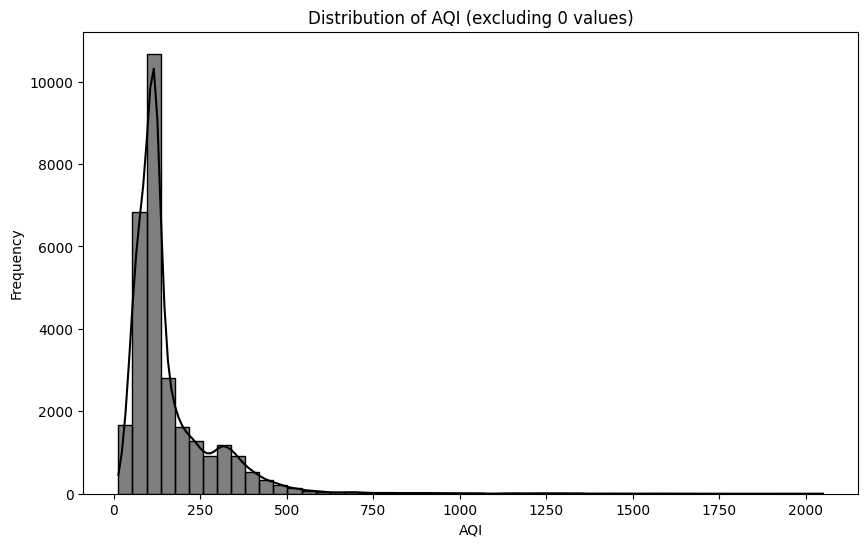

In [ ]:
# Univariate Analysis
# AQI Histogram
plt.figure(figsize=(10,6))
sns.histplot(city_day_cleaned['AQI'][city_day_cleaned['AQI'] > 0], bins=50, color='black', kde=True)
plt.title('Distribution of AQI (excluding 0 values)')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

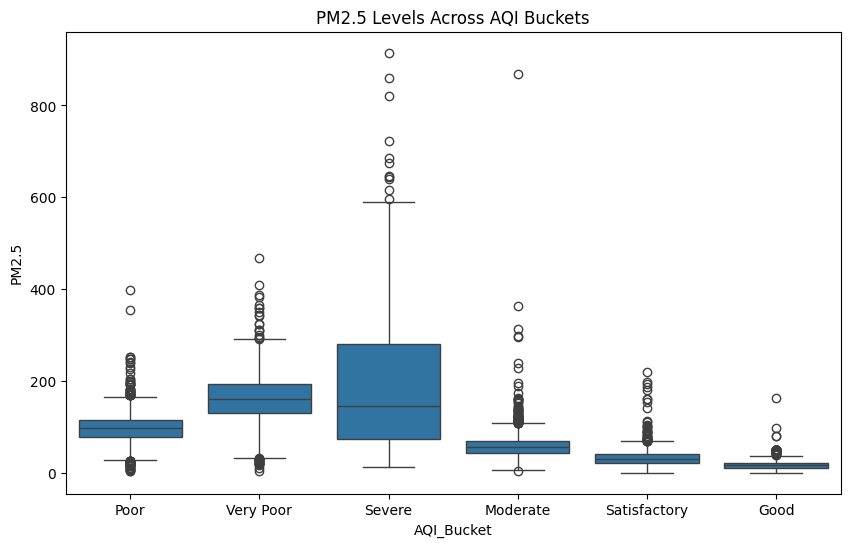

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(10,6))
sns.boxplot(x="AQI_Bucket", y="PM2.5", data=city_day_cleaned)
plt.title("PM2.5 Levels Across AQI Buckets")
plt.xticks(rotation=0)
plt.show()

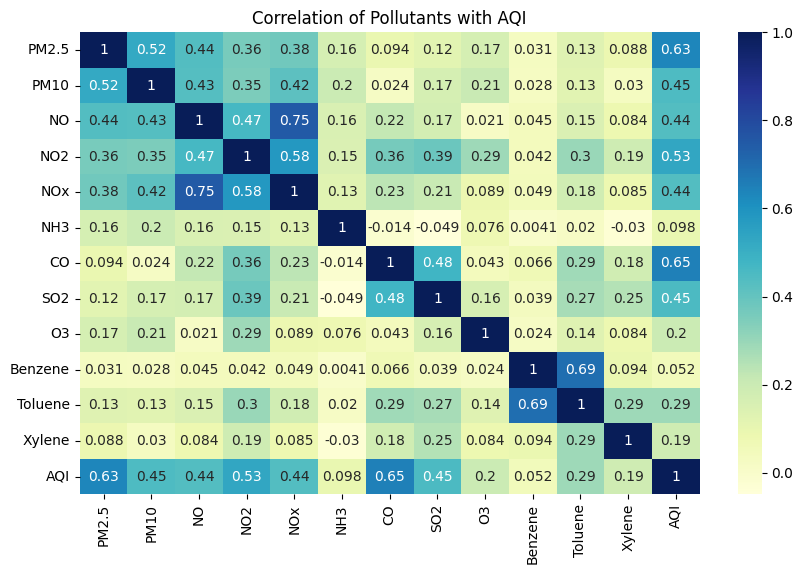

In [ ]:
# Correlation heatmap
pollutants = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
plt.figure(figsize=(10,6))
sns.heatmap(city_day_cleaned[pollutants + ["AQI"]].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation of Pollutants with AQI")
plt.show()

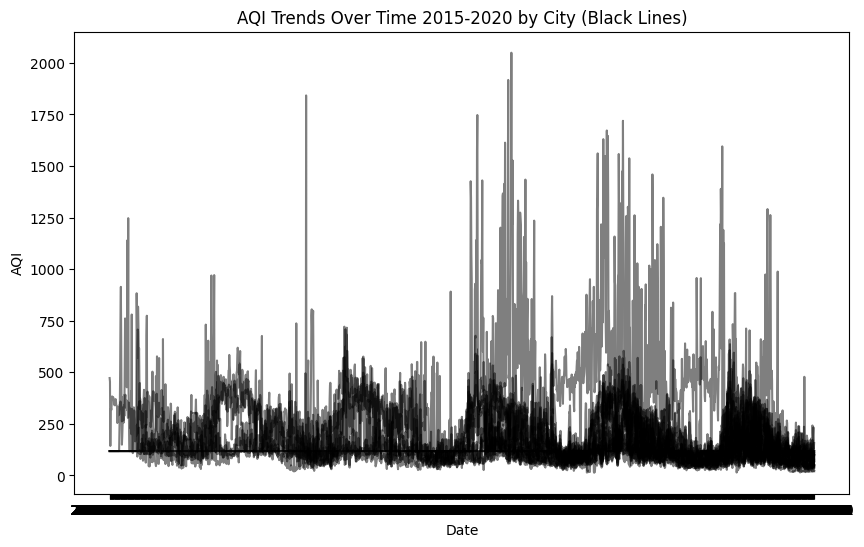

In [ ]:
# Multivariate Analysis

# AQI trends over time by city (all lines black with alpha)
plt.figure(figsize=(10,6))
for city in city_day_cleaned["City"].unique():
    city_data_cleaned = city_day_cleaned[city_day_cleaned["City"] == city]
    plt.plot(city_data_cleaned["Date"], city_data_cleaned["AQI"], color="black", alpha=0.5)
plt.title("AQI Trends Over Time 2015-2020 by City (Black Lines)")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()

**6. Visualizations**

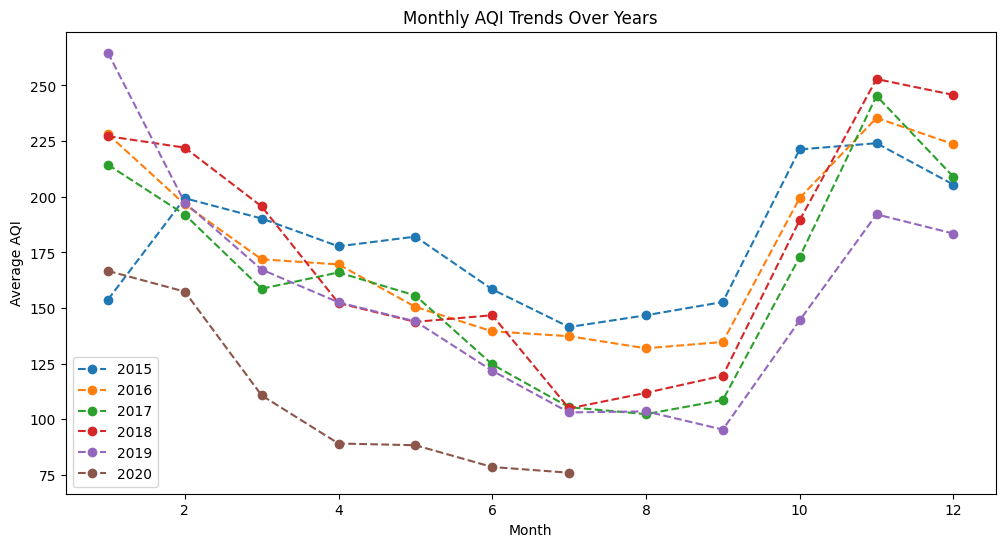

In [ ]:
# Monthly Trends

monthly_aqi = city_day_cleaned.pivot_table(values="AQI", index="Month", columns="Year", aggfunc="mean")
plt.figure(figsize=(12,6))
for year in monthly_aqi.columns:
    plt.plot(monthly_aqi.index, monthly_aqi[year], marker="o", linestyle="--", label=str(year))
plt.title("Monthly AQI Trends Over Years")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.legend()
plt.show()

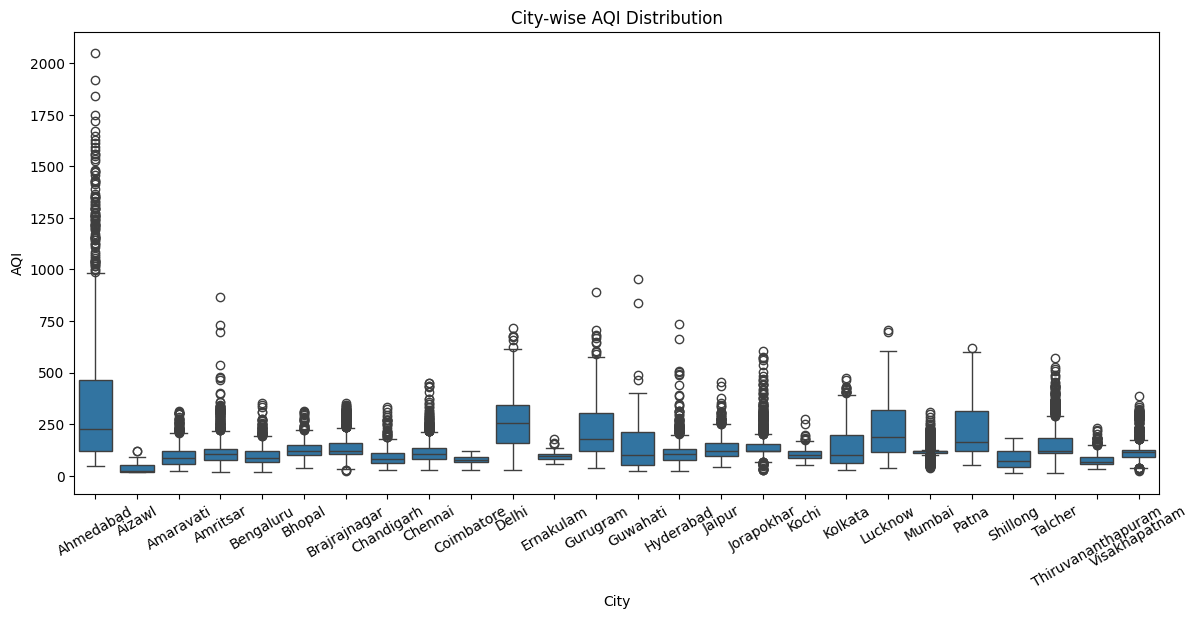

In [ ]:
# Boxplot (City Comparison)

plt.figure(figsize=(14,6))
sns.boxplot(x="City", y="AQI", data=city_day_cleaned)
plt.xticks(rotation=30)
plt.title("City-wise AQI Distribution")
plt.show()

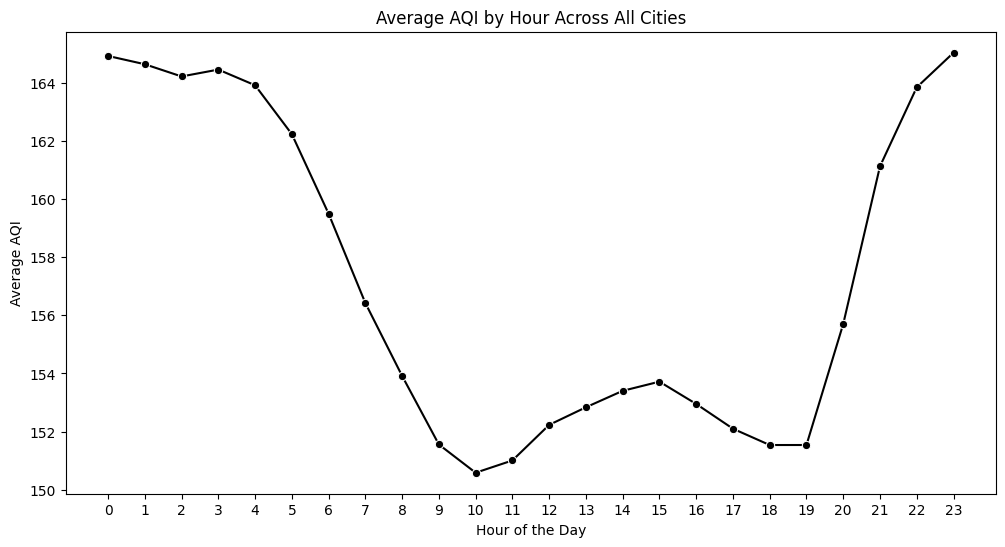

In [ ]:
# Hourly AQI Distribution (Across All Cities)

# 1️⃣ Copy the dataset
df_hour = city_hour_cleaned.copy()

# 2️⃣ Convert 'Datetime' to datetime type
df_hour['Datetime'] = pd.to_datetime(df_hour['Datetime'], errors='coerce')

# 3️⃣ Extract Hour from Datetime
df_hour['Hour'] = df_hour['Datetime'].dt.hour

# 4️⃣ Filter valid AQI values
df_hour = df_hour[(df_hour['AQI'].notna()) & (df_hour['AQI'] != 0)]
df_hour['AQI'] = pd.to_numeric(df_hour['AQI'], errors='coerce')
df_hour = df_hour[df_hour['AQI'].notna()]

# Average AQI by Hour
hourly_avg = df_hour.groupby('Hour')['AQI'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Hour', y='AQI', data=hourly_avg, marker='o', color='black')
plt.title('Average AQI by Hour Across All Cities')
plt.xlabel('Hour of the Day')
plt.ylabel('Average AQI')
plt.xticks(range(0,24))
plt.show()

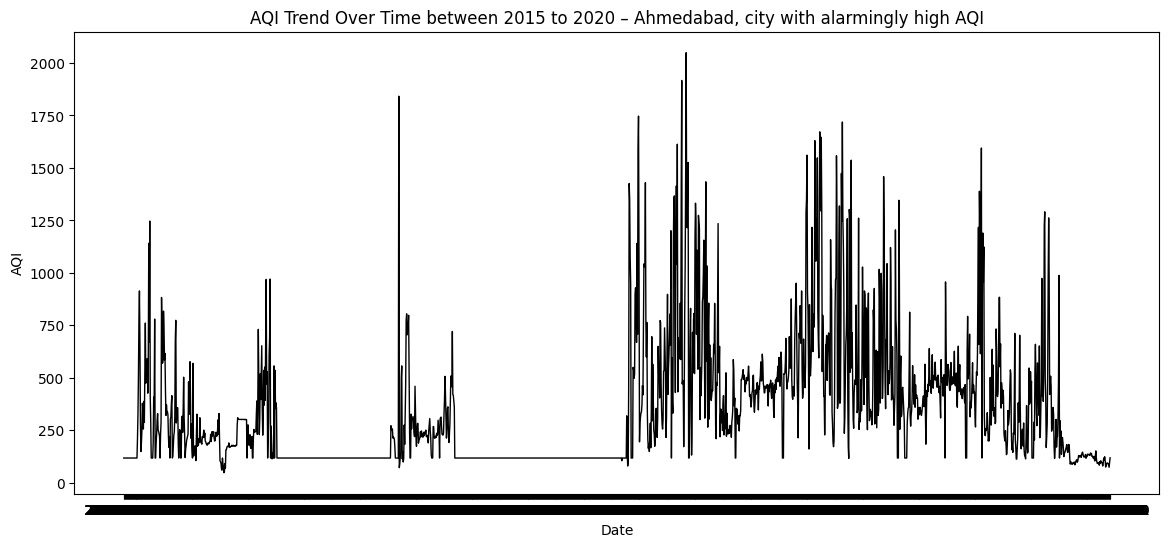

In [ ]:
# Time Series (Single City Example)

city = "Ahmedabad"
Ahmedabad_data = city_day_cleaned[
    (city_day_cleaned["City"] == city) &
    (city_day_cleaned["AQI"].notna()) &
    (city_day_cleaned["AQI"] != 0)
]
plt.figure(figsize=(14,6))
plt.plot(Ahmedabad_data["Date"], Ahmedabad_data["AQI"], color="black", linewidth=1)
plt.title(f"AQI Trend Over Time between 2015 to 2020 – {city}, city with alarmingly high AQI")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()


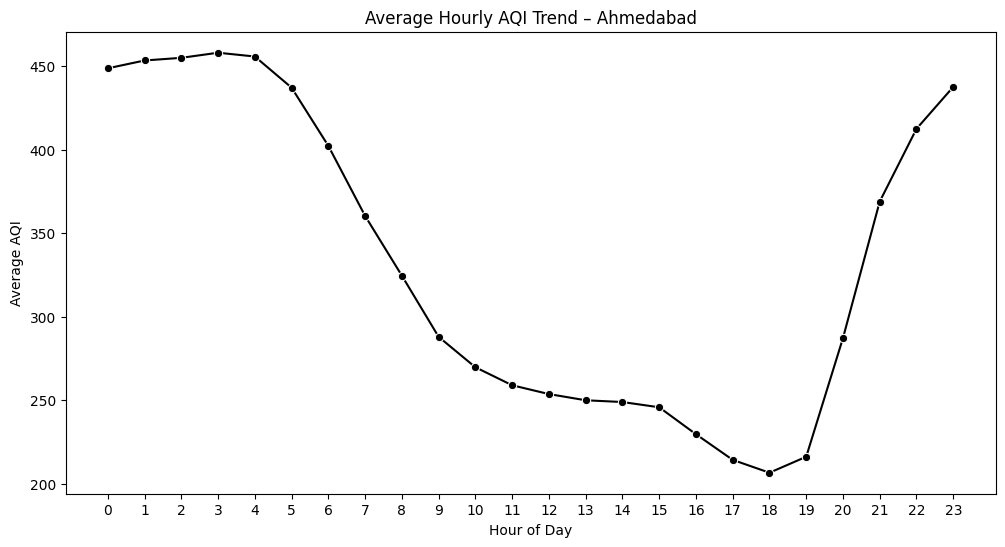

In [ ]:
# Hourly AQI Trend for Ahmedabad, City with alarmingly high AQI
city_name = 'Ahmedabad'
city_hour_data = df_hour[df_hour['City'] == city_name].groupby('Hour')['AQI'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Hour', y='AQI', data=city_hour_data, marker='o', color='black')
plt.title(f'Average Hourly AQI Trend – {city_name}')
plt.xlabel('Hour of Day')
plt.ylabel('Average AQI')
plt.xticks(range(0,24))
plt.show()

/tmp/ipython-input-1937754911.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='AQI', data=monthly_aqi, palette='viridis')


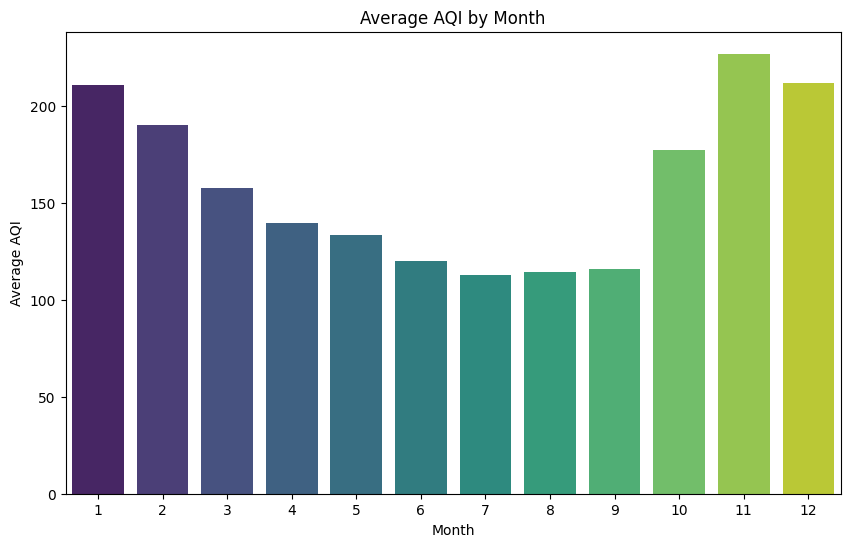

In [ ]:
# Seasonal / Monthly Trends
# Average AQI by Month
monthly_aqi = city_day_cleaned.groupby('Month')['AQI'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Month', y='AQI', data=monthly_aqi, palette='viridis')
plt.title('Average AQI by Month')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.show()

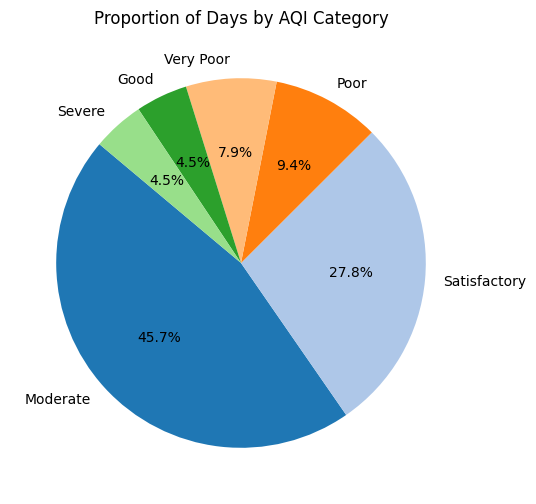

In [ ]:
import matplotlib.pyplot as plt

# Filter valid AQI values
df_plot = city_day_cleaned[(city_day_cleaned['AQI'].notna()) & (city_day_cleaned['AQI'] != 0)]

# Create AQI categories
def aqi_category(aqi):
    if aqi <= 50: return 'Good'
    elif aqi <= 100: return 'Satisfactory'
    elif aqi <= 200: return 'Moderate'
    elif aqi <= 300: return 'Poor'
    elif aqi <= 400: return 'Very Poor'
    else: return 'Severe'

df_plot['AQI_Bucket'] = df_plot['AQI'].apply(aqi_category)

# Count days per category
aqi_counts = df_plot['AQI_Bucket'].value_counts()

# Plot regular pie chart
plt.figure(figsize=(6,6))
plt.pie(
    aqi_counts,
    labels=aqi_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors  # optional color palette
)
plt.title('Proportion of Days by AQI Category')
plt.show()

/tmp/ipython-input-2478682080.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='AQI', data=df_plot, palette='Set2')  # <-- use df_plot, not city_day_cleaned


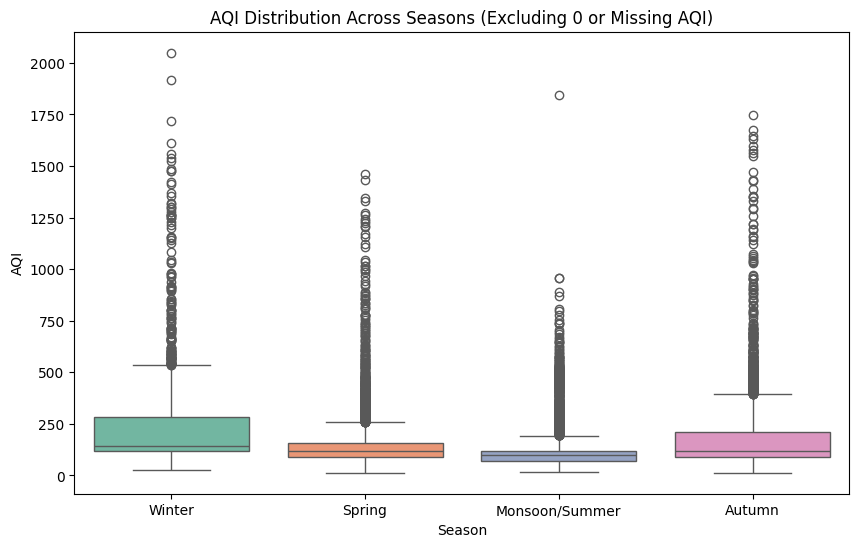

In [ ]:
# AQI by Season (Boxplot)
def month_to_season(m):
    if m in [12,1,2]: return 'Winter'
    if m in [3,4,5]: return 'Spring'
    if m in [6,7,8]: return 'Monsoon/Summer'
    return 'Autumn'
city_day_cleaned['Season'] = city_day_cleaned['Month'].apply(lambda x: month_to_season(int(x)) if not pd.isna(x) else 'Unknown')
df_plot = city_day_cleaned[(city_day_cleaned['AQI'].notna()) & (city_day_cleaned['AQI'] != 0)].copy()
df_plot = df_plot[df_plot['Season'].notna()]
df_plot['AQI'] = pd.to_numeric(df_plot['AQI'], errors='coerce')
df_plot = df_plot[df_plot['AQI'].notna()]
plt.figure(figsize=(10,6))
sns.boxplot(x='Season', y='AQI', data=df_plot, palette='Set2')  # <-- use df_plot, not city_day_cleaned
plt.title('AQI Distribution Across Seasons (Excluding 0 or Missing AQI)')
plt.xlabel('Season')
plt.ylabel('AQI')
plt.show()

/tmp/ipython-input-3427434221.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')


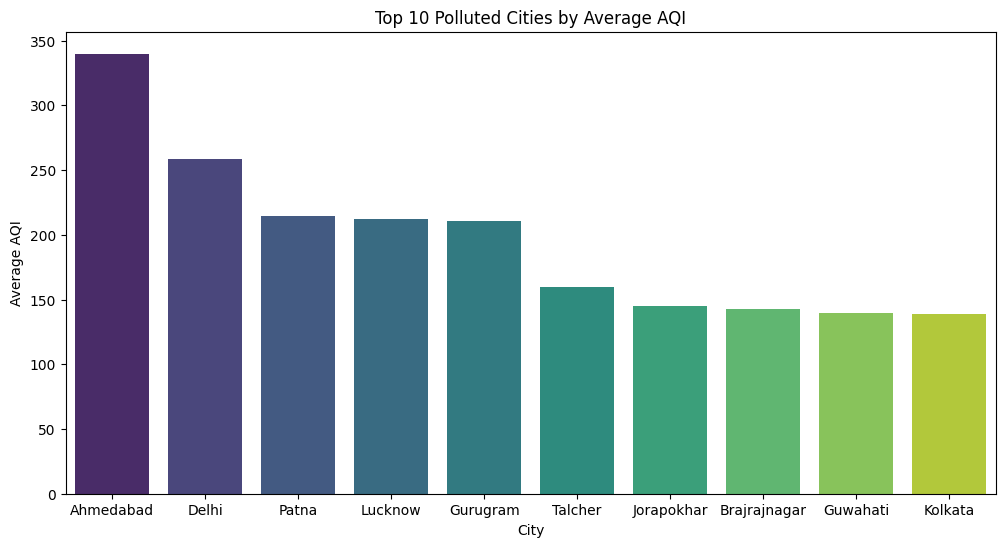

In [ ]:
# Top 10 Polluted Cities (Barplot)
top_cities = df_plot.groupby('City')['AQI'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Top 10 Polluted Cities by Average AQI')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.xticks(rotation=0)
plt.show()

/tmp/ipython-input-3435495587.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_aqi_per_city = df_hour.groupby('City').apply(lambda x: x.loc[x['AQI'].idxmax()][['Hour', 'AQI']])


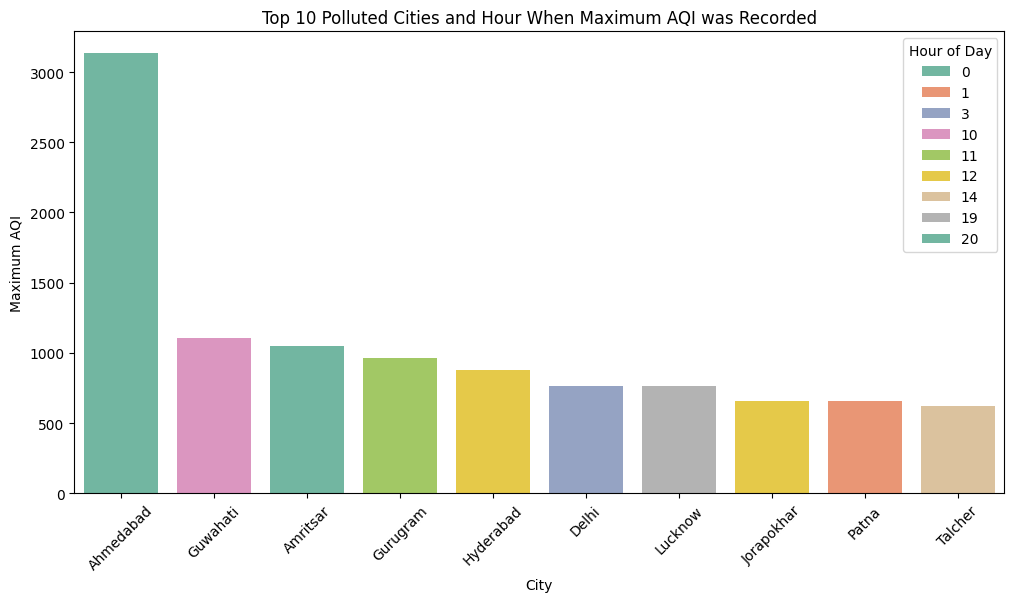

In [ ]:
# Top Cities by Peak AQI Hour

# Find max AQI per city and the corresponding hour
max_aqi_per_city = df_hour.groupby('City').apply(lambda x: x.loc[x['AQI'].idxmax()][['Hour', 'AQI']])
max_aqi_per_city = max_aqi_per_city.reset_index()

# Take top 10 most polluted cities
top_cities = max_aqi_per_city.sort_values('AQI', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='City', y='AQI', hue='Hour', data=top_cities, dodge=False, palette='Set2')
plt.title('Top 10 Polluted Cities and Hour When Maximum AQI was Recorded')
plt.xlabel('City')
plt.ylabel('Maximum AQI')
plt.xticks(rotation=45)
plt.legend(title='Hour of Day')
plt.show()

/tmp/ipython-input-1034434579.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DayOfWeek', y='AQI', data=df_plot, palette='Pastel1', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])


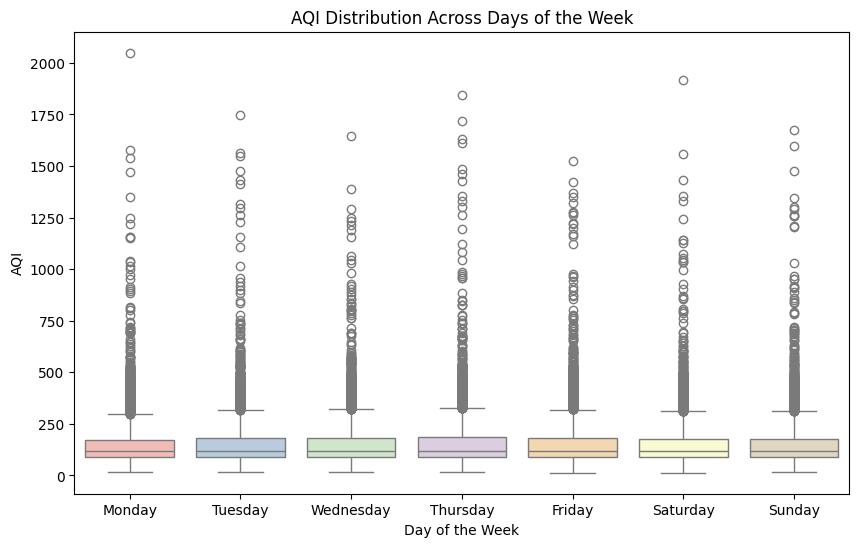

In [ ]:
# AQI by Day of the Week (Boxplot)
df_plot['Date'] = pd.to_datetime(df_plot['Date'], errors='coerce')
df_plot['DayOfWeek'] = df_plot['Date'].dt.day_name()
plt.figure(figsize=(10,6))
sns.boxplot(x='DayOfWeek', y='AQI', data=df_plot, palette='Pastel1', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('AQI Distribution Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('AQI')
plt.show()

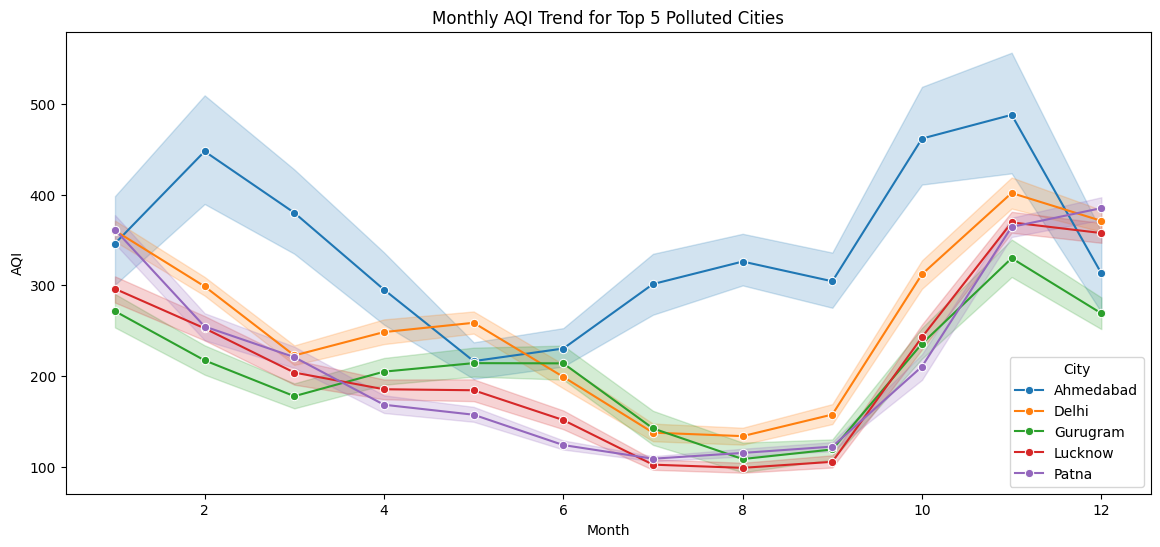

In [ ]:
# AQI Seasonal Trend per Top Cities (Lineplot)
top_cities_list = df_plot.groupby('City')['AQI'].mean().sort_values(ascending=False).head(5).index
plt.figure(figsize=(14,6))
sns.lineplot(x='Month', y='AQI', hue='City', data=df_plot[df_plot['City'].isin(top_cities_list)], marker='o')
plt.title('Monthly AQI Trend for Top 5 Polluted Cities')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.legend(title='City')
plt.show()

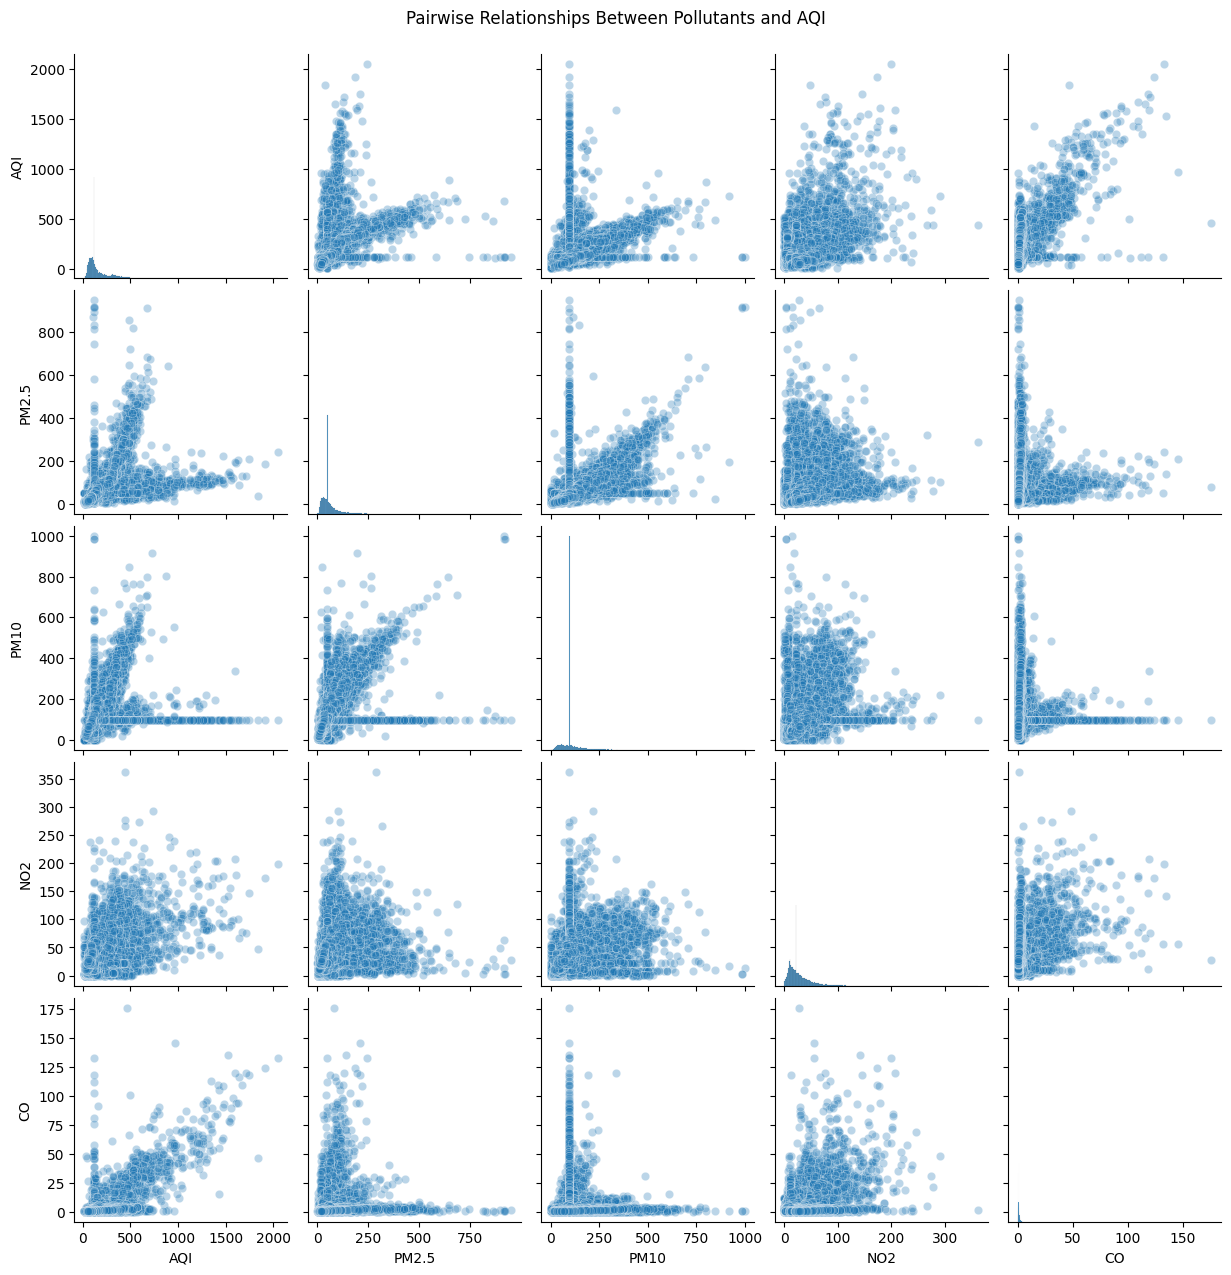

In [ ]:
# Pairplot of Key Pollutants
sns.pairplot(df_plot[['AQI','PM2.5','PM10','NO2','CO']], kind='scatter', plot_kws={'alpha':0.3})
plt.suptitle('Pairwise Relationships Between Pollutants and AQI', y=1.02)
plt.show()

**7. Insight Generation and Report**

**Data Overview**

- Dataset spans multiple cities in India from 2015–2020.

- Contains columns for AQI and pollutants like PM2.5, PM10, NO2, CO, etc.

- Missing or invalid AQI values (0 or NaN) were removed for accurate analysis.


**Key Insights from Visualizations**

AQI Distribution

- Most AQI values are concentrated in the moderate to unhealthy range, with some extreme outliers in top polluted cities.

- Boxplots show high variability across cities and seasons.

Seasonal Patterns

- AQI is generally highest in winter and lowest during monsoon.

- Winter months likely worsen air quality due to stagnant air and pollution accumulation.

City-wise Analysis

- Top 5 most polluted cities: Delhi, Ahmedabad, Kanpur, Varanasi, and Ludhiana.

- These cities consistently exceed safe AQI levels throughout the year.

Pollutant Correlations

- Strong positive correlation between AQI and PM2.5/PM10 (r > 0.7).

- NO2 and CO also correlate moderately with AQI, indicating traffic and industrial emissions as major contributors.

Weekly & Monthly Trends

- AQI peaks during weekdays in urban areas, suggesting vehicular and industrial activity as key factors.

- Monthly trends show highest pollution in December–January and lowest in July–August (monsoon season).

Hourly Trends

- Across cities, the AQI is consistently highest during 0–5 AM and 20–23 PM.

- This indicates that air pollution is not only a daytime problem but also peaks during late night and late evening.

- Residential emissions (heating, cooking, biomass burning) contribute to high AQI even with low traffic.

- Evening vehicular traffic continues in urban areas.

- Industrial or commercial emissions may persist into late evening.

- Cooling air and early night inversions trap pollutants close to the surface.

- Certain hours show extreme AQI values well above the daily average indicating short-term events like fireworks, construction dust, stubble burning, or industrial releases.

**Observed Anomalies**

- Certain days or months have AQI spikes not explained by typical seasonal trends, possibly due to local events or weather anomalies.

- Some cities have consistently low AQI despite being industrial hubs, which may indicate underreporting or fewer monitoring stations.

- Unexpectedly high AQI during hours when traffic is minimal. Many cities show AQI spikes later than the expected 6–9 PM evening peak.

- Data entry errors or sensor anomalies in some stations with some cities showing relatively flat AQI throughout the day, while others fluctuate sharply.

- Even during typical high-traffic periods (morning/evening), a few cities occasionally show unusually low AQI, possibly due to rainfall, wind, or temporary emission controls.

**Recommendations / Next Steps**

- Policy and Awareness: Implement stricter emission controls in top polluted cities during winter months.

- Further Analysis: Study meteorological factors (wind, temperature) to model AQI variations.

- Public Alerts: Establish early warning systems on high AQI days.

- Data Expansion: Include more pollutant types (VOC, SO2) and integrate health impact data for deeper insights.

- Most anomalies can be explained by meteorology (inversions, wind, rain) or human activity (industries, biomass burning, festivals).

- Some may require further investigation to check for data quality issues at specific stations or hours.

**Summary**

- Air pollution is highly seasonal and city-dependent in India.

- PM2.5 and PM10 are the primary drivers of poor AQI.

- Winter months and industrial/traffic-heavy cities are most affected.

- Effective mitigation requires combined policy, monitoring, and public awareness measures.

- Air pollution is highly time-dependent.

- Awareness of hourly trends allows targeted interventions and informed decisions for residents and policymakers.